In [2]:

import datetime
import pandas as pd
import numpy as np
import random

jeopardy_file = "JEOPARDY_CSV.csv"

jeopardy_data = pd.read_csv(jeopardy_file)
jeopardy_data

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


In [3]:
#a-In this dataset 216930 rows r there. row represents the value and question answer by air date.
#grain means details present in a data not sufficiant.
#b-in this dataset their are lots of duplicates so thats why i might feel it is dirty dataset.

In [4]:
jeopardy_data.describe()

,Show Number
count,216930.000000
mean,4264.238519
std,1386.296335
min,1.000000
25%,3349.000000
50%,4490.000000
75%,5393.000000
max,6300.000000


In [5]:
jeopardy_data.columns = jeopardy_data.columns.str.replace(' ', '')
print(jeopardy_data.columns)

Index(['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')


In [6]:
jeopardy_data.columns

Index(['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [7]:
#How many unique shows were there each year?
jeopardy_data["AirDate"] = pd.to_datetime(jeopardy_data["AirDate"])
jeopardy_data["AirDate"].head()

0   2004-12-31
1   2004-12-31
2   2004-12-31
3   2004-12-31
4   2004-12-31
Name: AirDate, dtype: datetime64[ns]

In [8]:
jeopardy_data['Year'] = pd.DatetimeIndex(jeopardy_data['AirDate']).year
jeopardy_data.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,Year
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004


In [9]:
group_names = jeopardy_data.groupby("Year")
group_names["AirDate"].nunique()

Year
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: AirDate, dtype: int64

In [5]:
#c How many unique shows were there each year?
jeopardy_data["Category"].value_counts()

KeyError: 'Category'

In [11]:

jeopardy_data["Month"] = pd.DatetimeIndex(jeopardy_data['AirDate']).month
jeopardy_data["Month"].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [12]:
jeopardy_data["Month"] = pd.DatetimeIndex(jeopardy_data['AirDate']).month
jeopardy_data["Month"].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [14]:
#Are there any answers that appeared multiple times
jeopardy_df = jeopardy_data.groupby('Answer')['Question'].count()
jeopardy_df.head()

KeyError: 'Answer'

In [5]:
# Find the questions for the top three most common answers
jeopardy_df.values_counts()

AttributeError: 'DataFrame' object has no attribute 'values_counts'

In [14]:
group_names = jeopardy_data.groupby("Month")
group_names["ShowNumber" , "Month"].max()
jeopardy_data["Category"].head()

<ipython-input-14-aa8e324d73ab>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_names["ShowNumber" , "Month"].max()


0                            HISTORY
1    ESPN's TOP 10 ALL-TIME ATHLETES
2        EVERYBODY TALKS ABOUT IT...
3                   THE COMPANY LINE
4                EPITAPHS & TRIBUTES
Name: Category, dtype: object

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




C:\Users\sachn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '12/31/2004'

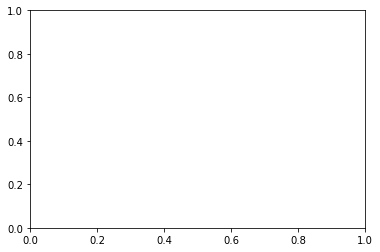

In [9]:
sns.distplot(jeopardy_data)

In [19]:
df_mean = jeopardy_data.groupby('Category')
df_mean

KeyError: 'Category'

NameError: name 'jeopardy_df' is not defined

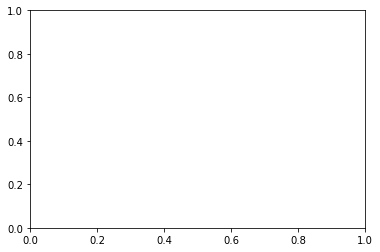

In [12]:
fig, ax=plt.subplots()
ax.bar(jeopardy_df["catogery_list"], df_cat["categoery_count"])
ax.set_xlabel("catogery_list")
ax.set_ylabel("categoery_count")
ax.set_title("TOP 5 categoery list vscategoery count")
plt.xticks(rotation=90)
plt.show()